In [1]:
from pycalphad import Database, Model, variables as v
from pycalphad import equilibrium
from pycalphad.core.solver import InteriorPointSolver
import numpy as np

In [2]:
from pycalphad.tests.datasets import *
ALFE_DBF = Database(ALFE_TDB)
probs = []

eq = equilibrium(ALFE_DBF, ['AL','FE', 'VA'], ['FCC_A1', 'AL13FE4'],
                 {v.MU('FE'): -123112, v.T: 300, v.P: 1e5}, verbose=True) #-123111.773

Components: AL FE VA
Phases: build_callables [N, P, T]
AL13FE4 
FCC_A1 
[done]
build_callables [N, P, T]
Trying to improve poor solution
Chemical Potentials [  -8490.14016639 -123112.        ]
[ 0.  0.  0.  0.  0.  0.  0.]
[  1.00000000e+00   1.00000000e+05   3.00000000e+02   1.00000000e+00
   3.67224106e-13   1.00000000e+00   1.00000000e+00]
Status: 0 b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
('Composition Sets', [CompositionSet(FCC_A1, [  1.00000000e+00   3.67224106e-13], NP=1.0, GM=-8490.140162919059)])


build_callables [P, T]
build_callables [P, T]


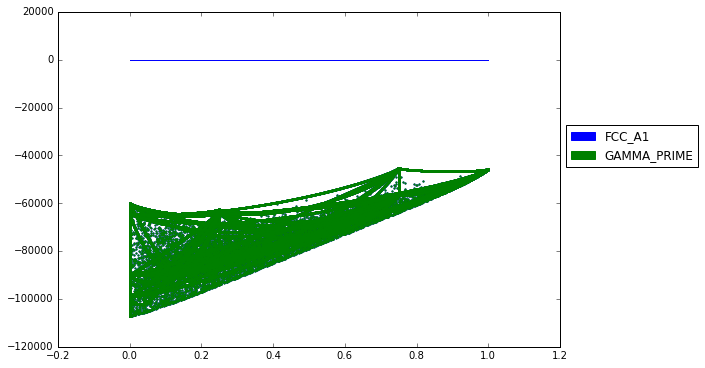

In [9]:
%matplotlib inline
from pycalphad import calculate, Database
from pycalphad.plot.utils import phase_legend
import numpy as np
from pycalphad.tests.datasets import ISSUE43_TDB
import matplotlib.pyplot as plt

my_phases = ['FCC_A1', 'GAMMA_PRIME']
legend_handles, colorlist = phase_legend(my_phases)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()
for name in my_phases:
    result = calculate(Database(ISSUE43_TDB), ['AL', 'NI', 'CR', 'VA'], ['FCC_A1', 'GAMMA_PRIME'],
                     T=1273, P=101325)
    #gm = result.GM - np.sum(np.array([-135620.9960449, -47269.29002414, -92304.23688281])[None] * result.X.isel(T=0,P=0))
    ax.scatter(result.X.isel(T=0,P=0).sel(component='CR'), result.GM,
               marker='.', s=5, color=colorlist[name.upper()])
#ax.set_xlim((0.6, 1))
#ax.set_ylim((-500, 1000))
plt.plot([0,1], [0, 0])
ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))
plt.show()